In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
import cv2 as cv
%matplotlib inline

from src.guided_filter import average_filter, average_filter_multichannel, guided_filter_with_colored_guide
from src.utils import *
from src.fusion import *

# Import images

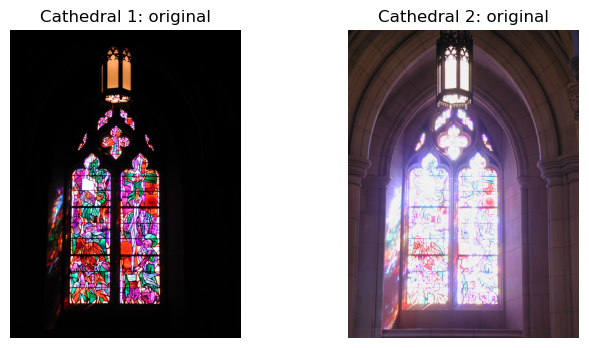

In [4]:
im1 = plt.imread("dataset/cathedral1.jpg")
im2 = plt.imread("dataset/cathedral2.jpg")
show_images(im1, im2, 'original', 'original')

# Image fusion with guided filtering

## Two-scale image decomposition

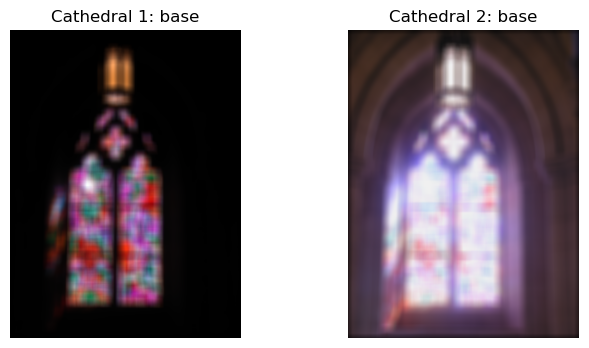

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


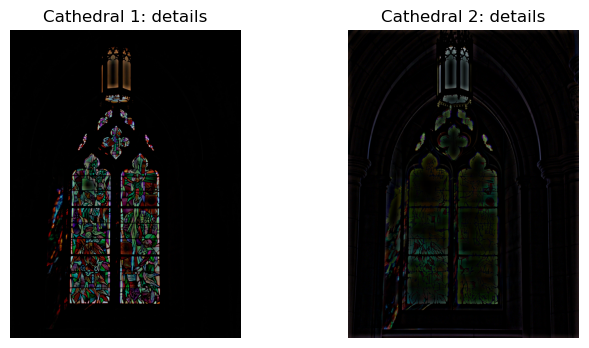

In [3]:
# Parameters
average_filter_size = 31

base1, detail1 = get_base_detail_layers(im1, average_filter_size)
base2, detail2 = get_base_detail_layers(im2, average_filter_size)

# Plot results
show_images(base1, base2, 'base', 'base')
show_images(detail1, detail2, 'details', 'details')

## Weight Map Construction With Guided Filtering

## Get saliency maps

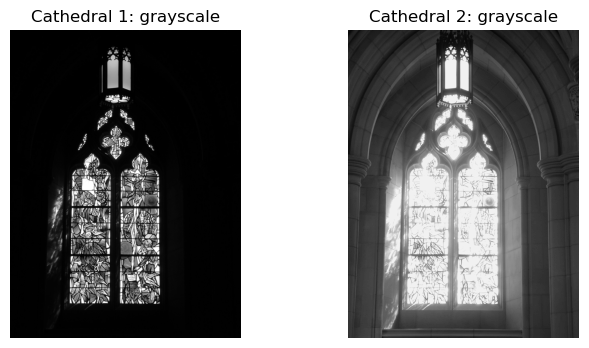

In [4]:
# We will convert images to grayscale to apply Laplacian filter
show_images(rgb2gray(im1), rgb2gray(im2), 'grayscale', 'grayscale', gray=True)

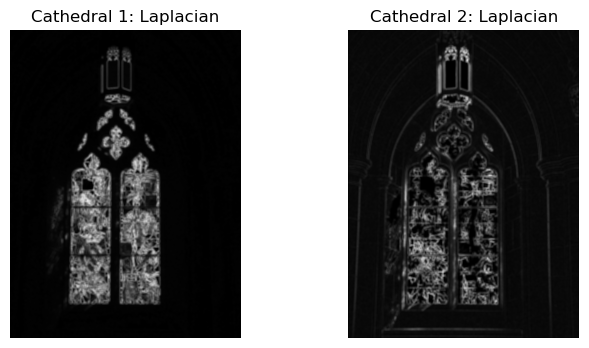

In [5]:
# Inspection of the Laplacian filter
H1 = apply_laplacian_filter(im1, kernel_size=3, local_average_size=7)
H2 = apply_laplacian_filter(im2, kernel_size=3, local_average_size=7)

# Show images
show_images(H1, H2, 'Laplacian', 'Laplacian', gray=True)

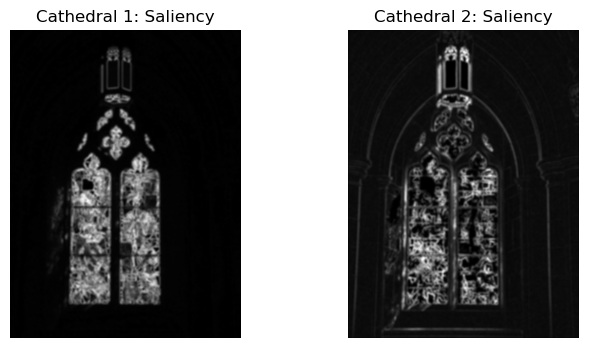

In [6]:
# Parameters
sigma = 5 # Standard deviation of the Gaussian kernel
radius = 5 # Radius of the Gaussian filter

# Compute saliency maps
saliency1 = get_saliency_map(im1, laplacian_kernel_size=3, local_average_size=7, gaussian_filter_sigma=sigma, gaussian_filter_radius=radius)
saliency2 = get_saliency_map(im2, laplacian_kernel_size=3, local_average_size=7, gaussian_filter_sigma=sigma, gaussian_filter_radius=radius)
saliency_maps = np.array([saliency1, saliency2])
show_images(saliency1, saliency2, 'Saliency', 'Saliency', gray=True)

### Get weight masks by saliency comparison

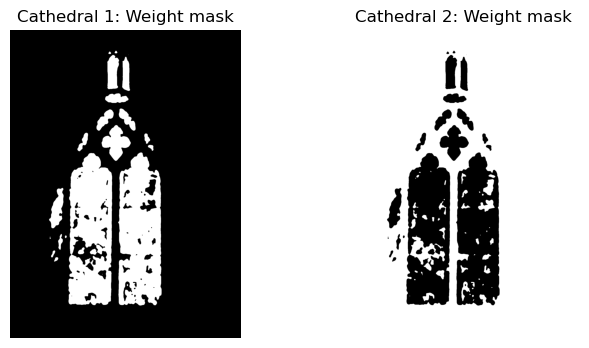

In [7]:
# Here implemented for only 2 images
P1, P2 = get_weight_mask_precursors(saliency_maps)
show_images(P1, P2, 'Weight mask', 'Weight mask', gray=True)

### Guided Filtering on weight masks to obtain spatial consistency

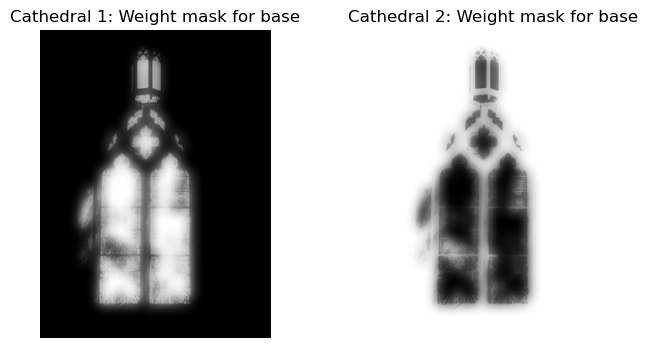

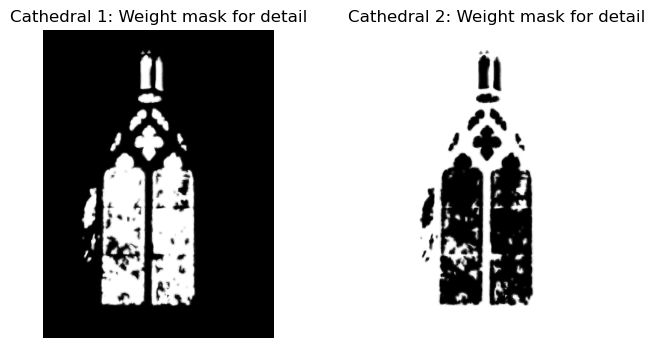

In [8]:
r1 = 45
r2 = 7
eps1 = 0.3
eps2 = 1e-6
W1B, W2B, W1D, W2D = get_weight_masks(saliency_maps, im1, im2, r1, eps1, r2, eps2)
show_images(W1B, W2B, 'Weight mask for base', 'Weight mask for base', gray=True)
show_images(W1D, W2D, 'Weight mask for detail', 'Weight mask for detail', gray=True)

### Reconstruction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


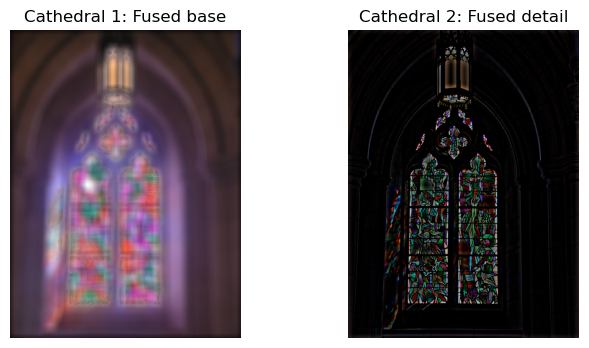

In [9]:
fusedB, fusedD = fuse_layers(base1, base2, detail1, detail2, W1B, W2B, W1D, W2D)
show_images(fusedB, fusedD, 'Fused base', 'Fused detail')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


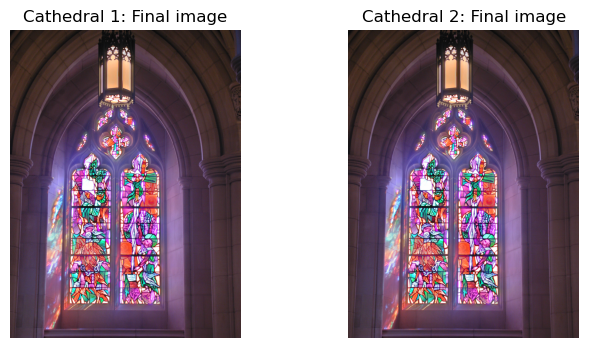

In [10]:
final_img = fusedB + fusedD
show_images(final_img, final_img, 'Final image', 'Final image')

# Test full pipeline

In [5]:
fused_image = fuse_images(im1, im2, verbose=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


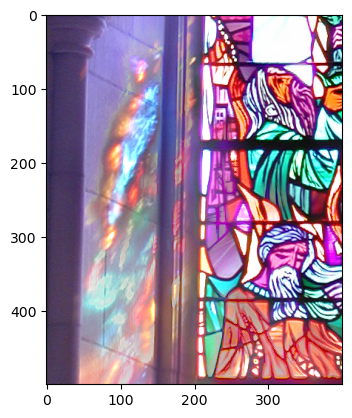

In [19]:
plt.imshow(fused_image[1000:1500, 200:600,:])